## Аппроксимация данных. Солнечная активность.

Ниже представлены данные по солнечной активности (усредненные числа Вольфа) с 1900 по 2015 гг. Изобразить данные. Подобрать модель, аппроксимирующую их. Построить график полученной аппроксимирующей функции. Можно воспользоваться пребразованием Фурье, чтобы определить частоту колебаний в солнечной активности. На какой ближайший год придется следующий пик солнечной активности?

Импортируем необходимые библиотеки :

In [208]:
import numpy as np
import matplotlib.pyplot as pp
%matplotlib inline
import sympy
from scipy.fft import fft, fftfreq

Собираем данные задачи :

In [140]:
# временной промежуток, на котором исследуется солнечная активность (будущая ось X)
years = np.arange(1900, 2016)
# солнечная активность в годы с 1900 по 2015 (будущая ось Y)
datas = np.array([15.7, 4.6, 8.5, 40.8, 70.1, 105.5, 90.1, 102.8, 80.9, 73.2, 30.9, 9.5, 6.0, 2.4, 16.1, 79.0, 95.0, 173.6, 134.6,
  105.7, 62.7, 43.5, 23.7, 9.7, 27.9, 74.0, 106.5, 114.7, 129.7, 108.2, 59.4, 35.1, 18.6, 9.2, 14.6, 60.2, 132.8, 190.6, 182.6, 148.0,
  113.0, 79.2, 50.8, 27.1, 16.1, 55.3, 154.3, 214.7, 193.0, 190.7, 118.9, 98.3, 45.0, 20.1, 6.6, 54.2, 200.7, 269.3, 261.7, 225.1, 159.0,
  76.4, 53.4, 39.9, 15.0, 22.0, 66.8, 132.9, 150.0, 149.4, 148.0, 94.4, 97.6, 54.1, 49.2, 22.5, 18.4, 39.3, 131.0, 220.1, 218.9,
  198.9, 162.4, 91.0, 60.5, 20.6, 14.8, 33.9, 123.0, 211.1, 191.8, 203.3, 133.0, 76.1, 44.9, 25.1, 11.6, 28.9, 88.3, 136.3, 173.9,
  170.4, 163.6, 99.3, 65.3, 45.8, 24.7, 12.6, 4.2, 4.8, 24.9, 80.8, 84.5, 94.0, 113.3, 69.8])

Визуализируем полученные данные :

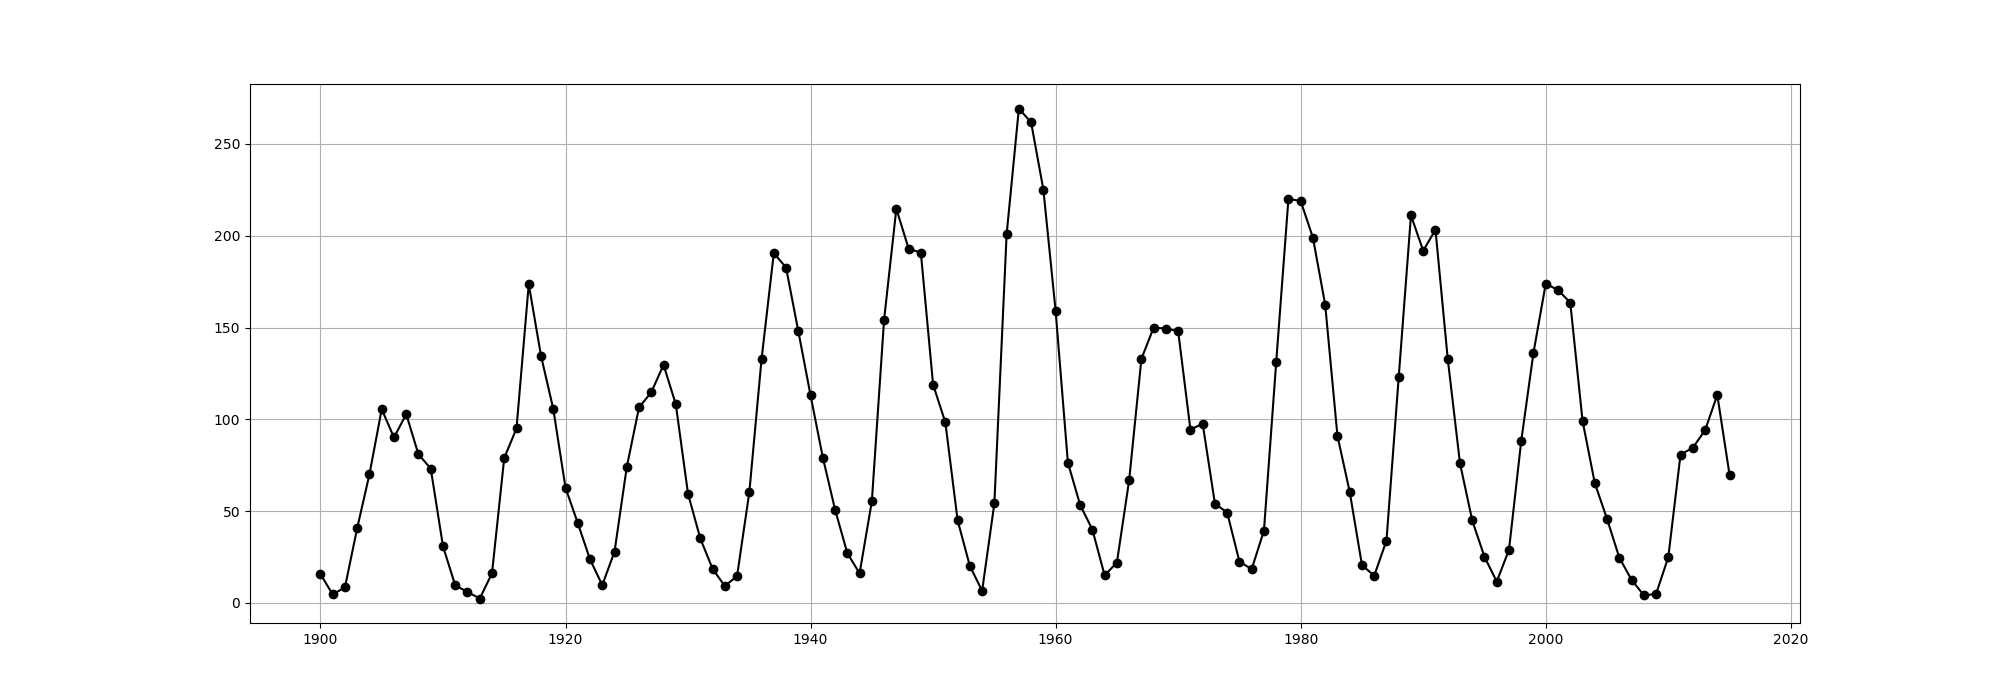

In [47]:
pp.figure(figsize=(20, 7))
pp.plot(years, datas, "ko-")
pp.grid()
pp.show()

По визуализации можно видеть, что график напоминает **синусоиду** (это можно понять по характерным для периодических функций "циклическим движениям" графика). Следовательно, для данной задачи аппроксимирующей функцией является **функция синуса**. Покажем это на графике :

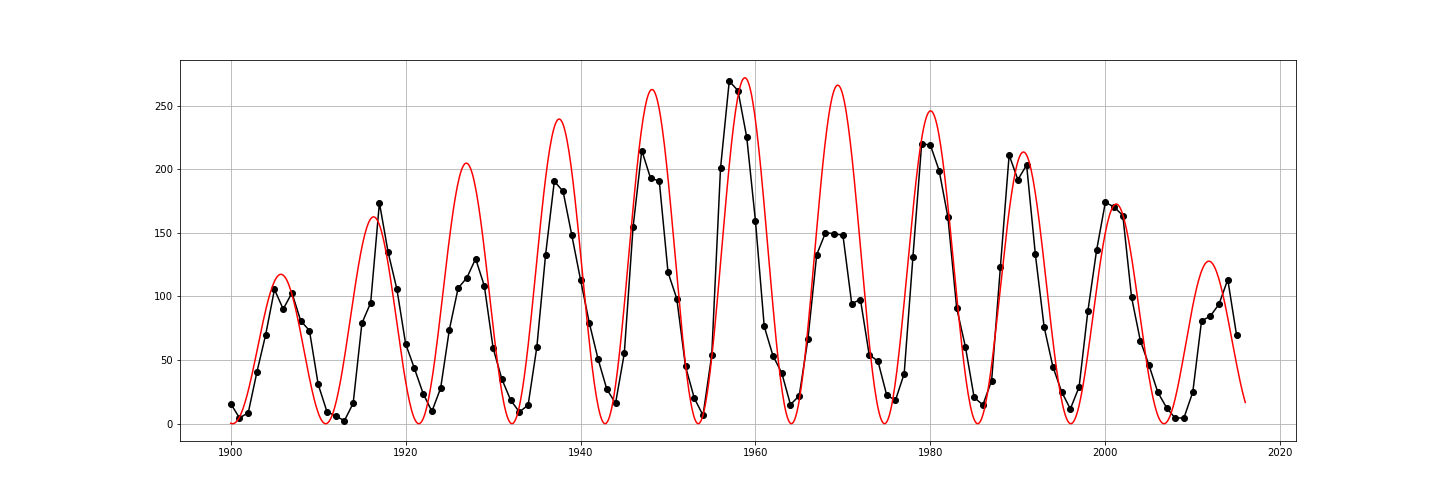

<Figure size 1440x504 with 0 Axes>

In [155]:
def f(x):
    return (np.sin((x - 1.33 + 1.5 * np.pi) * 0.59) + 1) * (np.sin((x - 1710) * np.pi * 0.01) + 1) * 68

x = np.linspace(1900, 2016, 1000)
pp.figure(figsize=(20, 7))
pp.plot(years, datas, "ko-")
pp.plot(x, f(x), "r-")
pp.grid()
pp.show()

Далее для определения частоты колебаний солнечной активности в заданном промежутке воспользуемся *преобразованием Фурье* и покажем результаты на графике :

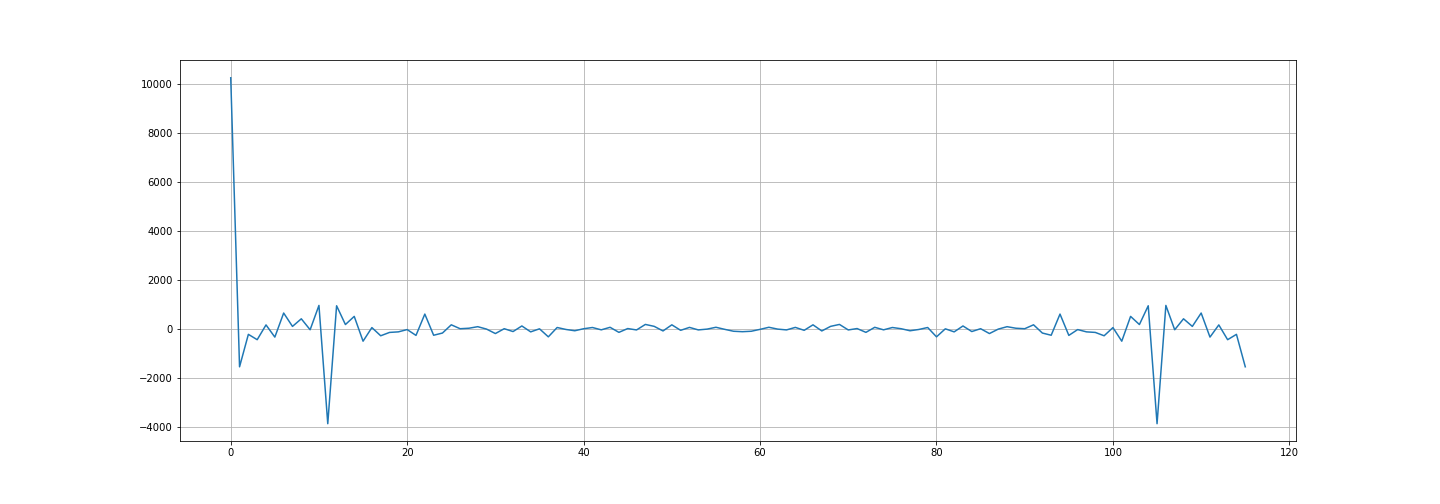

<Figure size 1440x504 with 0 Axes>

In [ ]:
y = [fft(datas)[i].real for i in range(len(fft(datas)))]
pp.figure(figsize=(20, 7))
pp.plot(np.arange(0, 2016-1900), y)
pp.grid()
pp.show()

Используя *преобразование Фурье* (функция **fft()** из библиотеки **scipy** возвращает массив комплексных чисел, однако в нашем случае комплексное число - это только тип данных, покольку мнимая часть у каждого значения из массива равна нулю и на практике эти числа используются как действительные), мы получили график частот колебаний солнечной активности за период, равный 116 годам. Ознакомимся с этим графиком поближе :

In [207]:
print("Частоты :", [index for index in range(len(y)) if y[index].real < -2000])

Частоты : [11, 105]


Из заметки, приведённой выше, следует, что самые ярко выраженные, очевидные колебания солнечной активности происходят приблизительно каждые 11 и 70-110 лет. Если взглянуть внимательно на график на отметки *x = 11*, *x = 105* и *x = 22*, то можно заметить значительные отклонения. Согласно *[данной статье](https://ru.wikipedia.org/wiki/Солнечная_цикличность)*, наиболее известными и часто регистрируемыми являются как раз солнечные циклы длинами 11, 22 и 70-100 лет соответственно. Теперь, используя полученные данные и закономерности, постараемся предсказать следующий пик солнечной активности :

In [216]:
maxes = np.array([years[i] for i in range(len(datas)) if datas[i] > 100])
print("Следующий пик солнечной активности будет достигнут в :", maxes[-1] + 10, "-", maxes[-1] + 11, "году.")

Следующий пик солнечной активности будет достигнут в : 2024 - 2025 году.


Таким образом, в результате проделанной работы нами был получен приблизительный год **(2024 - 2025)**, в который будет наблюдаться новый пик солнечной активности.

**Список материалов, которые я использовал для выполнения данной работы** :
- [Статья о солнечной цикличности](https://ru.wikipedia.org/wiki/Солнечная_цикличность)
- [Практическое применение преобразования Фурье в Python](https://docs.scipy.org/doc/scipy/tutorial/fft.html)
- [Применение преобразования Фурье в анализе сигналов](https://habr.com/ru/post/269991/)
- [Одинадцатилетний цикл солнечной активности](https://ru.wikipedia.org/wiki/Одиннадцатилетний_цикл_солнечной_активности)
- [Аппроксимация данных в Python](https://pythonpip.ru/examples/podgonka-krivoy-v-python-s-pomoschyu-biblioteki-scipy)
- [Аппроксимация нелинейных функций в Python](https://ru.stackoverflow.com/questions/808284/Как-аппроксимировать-нелинейную-функцию-в-python)